In [1]:
import sys
import json
import warnings

import numpy as np
import pandas as pd
import scanpy as sc
import pickle as pkl
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append('../..')
from scanpy import AnnData
from utils import UnimapResult, set_plot_theme

set_plot_theme()
warnings.filterwarnings('ignore')

/home/hht/.conda/envs/unimap1/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### RANKING

In [2]:
# raw_t_data = sc.read_h5ad('../../data/mg/mg_query.h5ad')
# unimap_result = UnimapResult('mg', 'unimap/2023', root_dir='../../results')
# models = ['unimap', 'harmony', 'seurat', 'code_adv', 'code_mmd','scgpt', 'bbknn',  'scalex', 'portal', 'scpoli', 'ingest']

# eval_results = pd.DataFrame()
# for model in models:
#     result = UnimapResult('mg', f'{model}/2023', root_dir='../../results', detailed=False)
#     eval_result = result.get_evaluation_index()
#     eval_results = pd.concat([eval_results, eval_result], axis=0)
# eval_results.to_csv('mg_eval_results.csv')

In [3]:
eval_results = pd.read_csv("results/mg_eval_results.csv", index_col=0)
eval_results.index = eval_results.index.map(lambda x: x.split('/')[0])

models = ['unimap', 'harmony', 'seurat', 'scgpt', 'bbknn', 'portal', 'scpoli', 'scalex', 'ingest', 'code_adv', 'code_mmd']

index_list = ['ari', 'isolated_labels_f1', 'clisi_graph', 'isolated_labels_asw', 'nmi', 'silhouette', 'overcorrection_score', 'acc', 'ilisi_graph', 'silhouette_batch', 'kBET', 'graph_connectivity']  # 'f1_score', 'average_shannons_score', 
index_list_bio = ['ari', 'isolated_labels_f1', 'clisi_graph', 'isolated_labels_asw', 'nmi', 'silhouette', 'overcorrection_score', ]  # 'f1_score', 'average_shannons_score'
index_list_batch = ['ilisi_graph', 'silhouette_batch', 'kBET', 'graph_connectivity']

eval_results = eval_results.reindex(models)

# ALL
eval_results = eval_results.loc[:, index_list]
eval_results_long = eval_results.melt(ignore_index=False).reset_index()
eval_results_long = eval_results_long.rename(columns={'index': 'model'})
eval_results_long['rank'] = eval_results_long.groupby('variable')['value'].rank(ascending=False)
eval_results_long_mean = eval_results_long.groupby('model').agg({'value': 'mean'}).reset_index()
eval_results_long_mean['rank'] = eval_results_long_mean['value'].rank(ascending=False)
eval_results_long_mean.index = eval_results_long_mean.model
eval_results_long_mean = eval_results_long_mean.loc[models, :]

# Bio
eval_results_bio = eval_results.loc[:, index_list_bio]
eval_results_long_bio = eval_results_bio.melt(ignore_index=False).reset_index()
eval_results_long_bio = eval_results_long_bio.rename(columns={'index': 'model'})
eval_results_long_bio['rank'] = eval_results_long_bio.groupby('variable')['value'].rank(ascending=False)
eval_results_long_mean_bio = eval_results_long_bio.groupby('model').agg({'value': 'mean'}).reset_index()
eval_results_long_mean_bio['rank'] = eval_results_long_mean_bio['value'].rank(ascending=False)
eval_results_long_mean_bio.index = eval_results_long_mean_bio.model
eval_results_long_mean_bio = eval_results_long_mean_bio.loc[models, :]

# Batch
eval_results_batch = eval_results.loc[:, index_list_batch]
eval_results_long_batch = eval_results_batch.melt(ignore_index=False).reset_index()
eval_results_long_batch = eval_results_long_batch.rename(columns={'index': 'model'})
eval_results_long_batch['rank'] = eval_results_long_batch.groupby('variable')['value'].rank(ascending=False)
eval_results_long_mean_batch = eval_results_long_batch.groupby('model').agg({'value': 'mean'}).reset_index()
eval_results_long_mean_batch['rank'] = eval_results_long_mean_batch['value'].rank(ascending=False)
eval_results_long_mean_batch.index = eval_results_long_mean_batch.model
eval_results_long_mean_batch = eval_results_long_mean_batch.loc[models, :]

In [4]:
eval_results

,ari,isolated_labels_f1,clisi_graph,isolated_labels_asw,nmi,silhouette,overcorrection_score,acc,ilisi_graph,silhouette_batch,kBET,graph_connectivity
unimap,0.801012,0.513342,0.997742,0.555376,0.667104,0.570401,0.851270,0.0,0.417454,0.933619,0.491954,0.934252
harmony,0.777058,0.501155,0.994829,0.558807,0.624536,0.508519,0.822326,0.0,0.486258,0.952406,0.625525,0.929959
seurat,0.762496,0.500380,0.997582,0.576666,0.636530,0.531783,0.844804,0.0,0.378612,0.898996,0.496093,0.916405
scgpt,0.778628,0.389958,0.997994,0.579335,0.636438,0.538732,0.852288,0.0,0.337502,0.901799,0.475992,0.954656
bbknn,0.778797,0.500923,0.997381,0.571536,0.638035,0.510768,0.854040,0.0,0.277629,0.944334,0.420320,0.948914
portal,0.775744,0.445052,0.997963,0.567549,0.628559,0.513962,0.848547,0.0,0.297520,0.909040,0.428831,0.938251
scpoli,0.488261,0.310148,0.995595,0.559514,0.573239,0.403041,0.817801,0.0,0.453356,0.780046,0.508895,0.854189
scalex,0.205220,0.326856,0.994114,0.552419,0.373306,0.510611,0.803147,0.0,0.403350,0.913741,0.457180,0.890606
ingest,0.146400,0.194366,0.994442,0.535567,0.391639,0.503831,0.822160,0.0,0.376375,0.936688,0.462881,0.894680
code_adv,0.652169,0.067761,0.985398,0.372360,0.507956,0.400592,0.704977,0.0,0.430211,0.720474,0.323151,0.500969


In [5]:
cmap1 = sns.color_palette("blend:" + '#FFF6F2' + "," + '#EE7F6D', n_colors=11)
cmap2 = sns.color_palette("Oranges", 16)[::1]  
cmap3 = sns.color_palette("BuPu", 16)[::1]

def set_theme(ax, xlim, metrics_list, model_list, one_tick=False, rotation=30, ha='right', fontweight='regular', fontsize=7):
    if ax.get_legend():
        ax.get_legend().remove()
    ax.set(xlabel=None, ylabel=None)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xlim(xlim)
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(len(metrics_list)))
    if one_tick != False:
        ax.set_xticks([one_tick])
    ax.set_xticklabels(metrics_list, rotation=rotation, ha=ha, fontweight=fontweight, fontsize=fontsize)
    ax.set_yticklabels(model_list, fontsize=fontsize)
    ax.tick_params(width=0.5, length=3)
    for patch in ax.patches:
        patch.set_linewidth(0.5)

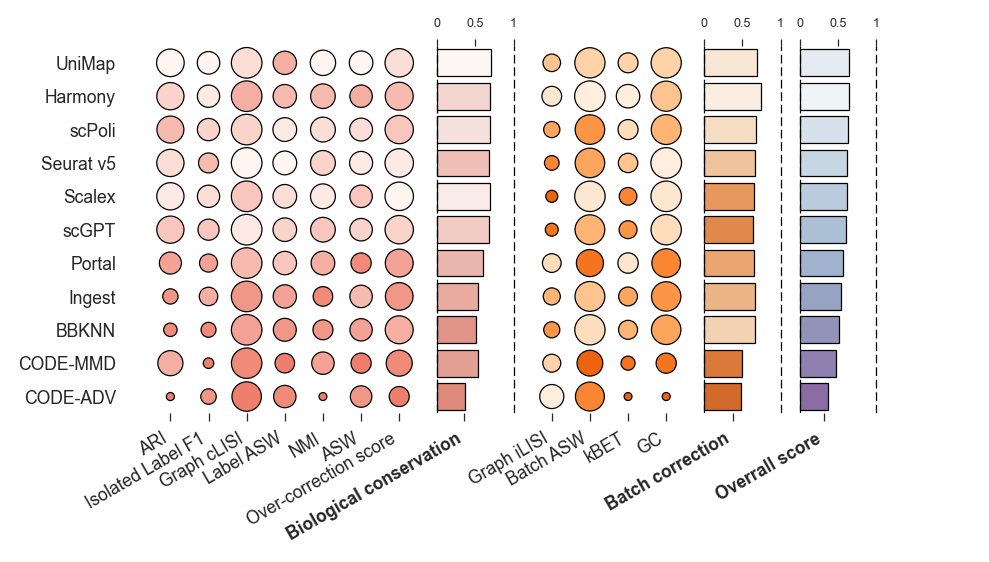

In [6]:
fig, axs = plt.subplots(figsize=(185 / 25.4, 250 / 25.4))
axs.remove()

xlim = [-1, 21]
w, h = 0.64, 0.28 / (250/185)
ax1 = fig.add_axes([0.14, 0.70, w, h])

ax1 = sns.scatterplot(x="variable", y="model", hue="rank", size="value", sizes=(10, 150), alpha=1,  palette=cmap1, edgecolor='black', data=eval_results_long_bio, ax=ax1, linewidths=0.5)
set_theme(ax1, xlim=xlim, metrics_list=['ARI', 'Isolated Label F1', 'Graph cLISI', ' Label ASW', 'NMI', 'ASW', 'Over-correction score'], model_list=['UniMap', 'Harmony', 'Seurat v5','scGPT', 'BBKNN', 'Portal', 'scPoli', 'Scalex', 'Ingest', 'CODE-ADV', 'CODE-MMD'])

ax2 = ax1.twiny()
ax2 = sns.barplot(x=eval_results_long_mean_bio['value'] * 2, y=models, palette=[cmap1[i] for i in eval_results_long_mean_bio['rank'].astype(int) - 1], edgecolor='black', ax=ax2, legend=True, )
ax2.axvline(x=0, linestyle='--', color='black', linewidth=0.5, dashes=(7, 3))
ax2.axvline(x=2, linestyle='--', color='black', linewidth=0.5, dashes=(7, 3))
set_theme(ax2, xlim=[i - 7 for i in xlim], metrics_list=['Biological conservation'], model_list=models, one_tick=eval_results_long_mean_bio['value'].max(), fontweight='bold')
# 字体加粗
ax2.set_yticklabels(ax2.get_yticklabels(), fontweight='bold')

ax22 = ax1.twiny()
set_theme(ax22, xlim=[i - 7 for i in xlim], metrics_list=['bio_rank'], model_list=models, one_tick=eval_results_long_mean_bio['value'].max(), rotation=0, ha='center')
ax22.set_xticks([0,1, 2])
ax22.set_xticklabels(['0', '0.5', '1'], fontsize=5)
ax22.xaxis.tick_top()

ax3 = ax1.twiny()
ax3 = sns.scatterplot(x="variable", y="model", hue="rank", size="value", sizes=(10, 150), alpha=1, palette=cmap2, edgecolor='black', data=eval_results_long_batch, ax=ax3, linewidths=0.5)
set_theme(ax3, xlim=[i - 10 for i in xlim], metrics_list=['Graph iLISI', 'Batch ASW', 'kBET', 'GC'], model_list=models)


ax4 = ax1.twiny()
ax4 = sns.barplot(x=eval_results_long_mean_batch['value'] * 2, y=models, palette=[cmap2[i] for i in eval_results_long_mean_batch['rank'].astype(int) - 1], edgecolor='black', ax=ax4, legend=True)
set_theme(ax4, xlim=[i - 14 for i in xlim], metrics_list=['Batch correction'], model_list=models, one_tick=eval_results_long_mean_batch['value'].max(), fontweight='bold')
ax4.axvline(x=0, linestyle='--', color='black', linewidth=0.5, dashes=(7, 3))
ax4.axvline(x=2, linestyle='--', color='black', linewidth=0.5, dashes=(7, 3))

ax44 = ax1.twiny()
set_theme(ax44, xlim=[i - 14 for i in xlim], metrics_list=['bio_rank'], model_list=models, one_tick=eval_results_long_mean_batch['value'].max(), rotation=0, ha='center')
ax44.set_xticks([0,1, 2])
ax44.set_xticklabels(['0', '0.5', '1'], fontsize=5)
ax44.xaxis.tick_top()

ax5 = ax1.twiny()
ax5 = sns.barplot(x=eval_results_long_mean['value'].values  * 2, y=models, palette=[cmap3[i] for i in eval_results_long_mean['rank'].astype(int) - 1], edgecolor='black', ax=ax5, legend=True)
set_theme(ax5, xlim=[i - 16.5 for i in xlim], metrics_list=['Overrall score'], model_list=models, one_tick=eval_results_long_mean['value'].max(), fontweight='bold')
ax5.axvline(x=0, linestyle='--', color='black', linewidth=0.5, dashes=(7, 3))
ax5.axvline(x=2, linestyle='--', color='black', linewidth=0.5, dashes=(7, 3))

ax55 = ax1.twiny()
set_theme(ax55, xlim=[i - 16.5 for i in xlim], metrics_list=['bio_rank'], model_list=['UniMap', 'Harmony', 'scPoli', 'Seurat v5', 'Scalex', 'scGPT', 'Portal', 'Ingest', 'BBKNN', 'CODE-MMD', 'CODE-ADV'], one_tick=eval_results_long_mean['value'].max(), rotation=0, ha='center')
ax55.set_xticks([0,1, 2])
ax55.set_xticklabels(['0', '0.5', '1'], fontsize=5)
ax55.xaxis.tick_top()

### 4 umap


In [7]:
def cal_gene(adata: AnnData, gene_list: list, groupby_column: str) -> pd.DataFrame:
    valid_genes = [gene for gene in gene_list if gene in adata.var_names]
    expression_matrix = adata[:, valid_genes].X
    groups = adata.obs[groupby_column]

    if not isinstance(expression_matrix, np.ndarray):
        expression_matrix = expression_matrix.toarray()

    results = {
        'group': [],
        'gene': [],
        'expression_proportion': [],
        'average_expression': []
    }

    for group in groups.unique():
        group_mask = (groups == group).values
        group_expression = expression_matrix[group_mask, :]
        
        expression_proportion = (group_expression > 0).sum(axis=0) / group_expression.shape[0]
        average_expression = group_expression.mean(axis=0)
        
        for gene, prop, avg in zip(valid_genes, expression_proportion, average_expression):
            results['group'].append(group)
            results['gene'].append(gene)
            results['expression_proportion'].append(prop)
            results['average_expression'].append(avg)

    return pd.DataFrame(results)


def plot_dotplot(adata: AnnData, gene_list: list, groupby_column: str, ax=None, group_index=None):
    df = cal_gene(adata, gene_list, groupby_column)
    df['gene'] = pd.Categorical(df['gene'], categories=gene_list, ordered=True) 
    df = df.sort_values('gene')
    gene_num = len(gene_list)
    if group_index is None:
        unique_groups = df['group'].unique()
    else:
        unique_groups = group_index
    df['group'] = pd.Categorical(df['group'], categories=unique_groups[::-1], ordered=True) 
    group_num = len(unique_groups)
    p = sns.scatterplot(data=df, x='gene', y='group', size='expression_proportion', hue='average_expression', palette='viridis', sizes=(0, 35), edgecolor='black', linewidth=0.0, ax=ax)
    p.legend_.remove()
    p.set_xlabel('')
    p.set_ylabel('')
    p.set_xlim(-1, gene_num)
    p.set_ylim(-0.5, group_num - 0.5)
    
    p.set_xticklabels(gene_list, fontsize=5, rotation=45, ha='right')  # fontstyle='italic', 
    p.set_yticklabels(unique_groups[::-1], fontsize=5)
    p.xaxis.set_tick_params(labelsize=5, pad=1)
    p.yaxis.set_tick_params(labelsize=5, pad=1)
    p.tick_params(bottom=True, top=False, left=True, right=False, length=2, width=0.5)
    

In [8]:
result = UnimapResult('mg', 'unimap/2023', root_dir='../../results', detailed=False)
umap1 = result.st_umap_result['umap1']
umap2 = result.st_umap_result['umap2']

color_dict = json.load(open('../../color_dict.json'))
ct_c = color_dict["mg_ct_query"]
pd_ct_c = color_dict["mg_ct_ref"]

ref_ct_l = result.s_result['celltype']
ct_w_l = result.s_result['pred_celltype_prob'].rank(method='dense', ascending=True)
query_ct_l = ['reference'] * len(result.s_result) + list(result.t_result['celltype'])
query_pd_ct_l = ['reference'] * len(result.s_result) + list(result.t_result['pred_celltype'])


In [9]:
mg_query = sc.read_h5ad( '../../data/mg/mg_query.h5ad')
mg_hvgs = pkl.load(open( '../../data/mg/hvg_1649_mg.pkl', "rb"))

mg_query.obs = pd.concat([mg_query.obs, result.t_result.loc[:, ['pred_celltype', 'pred_cell_prob']]], axis=1)
mg_query.obsm['X_emb'] = result.t_z_result.values
mg_query.var_names_make_unique()
mg_query = mg_query[mg_query.obs['celltype'] != 'nan', :]
sc.pp.filter_cells(mg_query, min_genes=200)
sc.pp.filter_genes(mg_query, min_cells=3)
sc.pp.normalize_total(mg_query, target_sum=1e6)
sc.pp.log1p(mg_query)
mg_query = mg_query[:, mg_query.var.index.isin(mg_hvgs)]
mg_query.raw = mg_query

# mg_query.obsm['X_pca'] = result.t_z_result.reindex(mg_query.obs.index).values
mg_query.obsm['X_umap'] = result.t_umap_result.reindex(mg_query.obs_names).values


mg_t = mg_query[(mg_query.obs['celltype'].isin(["Tcm/Naive helper T cells", "Tem/Temra cytotoxic T cells", "Tem/Trm cytotoxic T cells", "MAIT cells", "Tem/Effector helper T cells", "Tcm/Naive cytotoxic T cells", "Regulatory T cells", "CD16+ NK cells"]))].copy()
mg_t = mg_t[mg_t.obs.groupby('pred_celltype').filter(lambda x: len(x) > 10).index, :]
# mg_t = mg_t[~mg_t.obs['pred_celltype'].isin(['Naive B cell'])]

# sc.tl.rank_genes_groups(mg_t, "pred_celltype", method="t-test")
# t_marker_list = list(set(pd.DataFrame(mg_t.uns["rank_genes_groups"]["names"]).head(5).values.flatten()))
# t_marker_dict = {k: list(pd.DataFrame(mg_t.uns["rank_genes_groups"]["names"]).head(5)[k]) for k in mg_t.obs['pred_celltype'].unique()}

In [10]:
pd_ct_c = {'reference': '#E0E0E0', 'Macrophage': '#d6616b', 'aa CD8 T cell (I)': '#fd8d3c', 'DP T cell': '#aec7e8', 'DN T cell': '#9e9ac8', 'Monocyte (CD14)': '#e7969c', 'aa CD8 T cell (II)': '#5254a3', 'Thymic memory B cell': '#8ca252', 'Cycling DN/DP T cell': '#bd9e39', 'CD4 Tcm (Th0)': '#d9d9d9', 'CD8 Tnaive': '#a55194', 'Thymic CD4 T cell (II)': '#9ecae1', 'Naive B cell': '#fdae6b', 'mTEC (I)': '#a1d99b', 'NK cell': '#bcbddc', 'CD4 Tnaive': '#74c476', 'CD4 Tem (Th1/17)': '#ffa500', 'Memory B cell (II)': '#b5cf6b', 'Pre GC B cell': '#e7ba52', 'Plasmablast': '#6baed6', 'CD4 Tcm (Tfh)': '#ce6dbd', 'gd T cell': '#c6dbef', 'CD4 Temra (Th1)': '#fdd0a2', 'CD4 Tcm (Th2)': '#de9ed6', 'Thymic CD4 T cell (I)': '#dadaeb', 'Unswitched memory B cell': '#e6550d', 'Memory B cell (I)': '#9c9ede', 'CD4 Tcm (Th17)': '#8c6d31', 'Naive Treg': '#e7cb94', 'CD8 Temra': '#a2c8ec', 'cDC1': '#c7e9c0', 'CD4 Tem (Th1)': '#3182bd', 'T agonist': '#ad494a', 'GC B cell': '#636363', 'Thymic CD8 T cell': '#756bb1', 'NKT cell (periphery)': '#31a354', 'pDC': '#393b79', 'cDC2': '#637939', 'mTEC (II)': '#cedb9c', 'NKT cell (thymus)': '#b6d957', 'CD8 Tem': '#7b4173', 'CD8 Trm': '#ff0000', 'Normal fibroblast': '#ff6d00', 'cTEC': '#6b6ecf', 'ILC': '#ffc000', 'Activated Treg': '#ffe100', 'Monocyte (CD16)': '#843c39', 'Endothelial cell': '#a7e3a7', 'Tumor associated fibroblast': '#7cbc5e', 'nmTEC': '#389c90'}

ct_c = {"reference": "#E0E0E0", "Age-associated B cells": "#e6550d", "Naive B cells": "#fdae6b", "Memory B cells": "#9c9ede", "Plasma cells": "#6baed6", "Classical monocytes": "#e7969c",   "Non-classical monocytes": "#843c39", "Neutrophils": "#a55194", "Megakaryocytes/platelets": "#fdae6b", "Neutrophil-myeloid progenitor": "#c49c94", "CD16+ NK cells": "#bcbddc", "Tem/Temra cytotoxic T cells": "#a2c8ec",   "MAIT cells": "#ffa500", "Tem/Trm cytotoxic T cells": "#7b4173", "Tem/Effector helper T cells": "#de9ed6", "Tcm/Naive helper T cells": "#74c476", "Tcm/Naive cytotoxic T cells": "#a55194", "Regulatory T cells": "#8c6d31", "DC2": "#637939", "HSC/MPP": "#9e9ac8", "Late erythroid": "#ce6dbd"
    }

In [11]:
# fig, axs = plt.subplots(figsize=(185 / 25.4, 250 / 25.4))
# axs.remove()
positions = [[0.02, 0.43, 0.23, 0.23 / (250/185)],
             [0.25, 0.43, 0.23, 0.23 / (250/185)],
             [0.48, 0.43, 0.23, 0.23 / (250/185)],
             [0.71, 0.43, 0.23, 0.23 / (250/185)]]
# pd_ct_c.update({'CD4 Tem (Th1)': 'red', 'CD4 Tem (Th1/17)': 'black'})
p1 = sns.scatterplot(x=umap1, y=umap2, alpha=0.9, s=0.1, hue=ref_ct_l,      edgecolor='none', palette=pd_ct_c,   ax=fig.add_axes(positions[0]), rasterized=True)
p2 = sns.scatterplot(x=umap1, y=umap2, alpha=0.9, s=0.1, hue=query_ct_l,    edgecolor='none', palette=ct_c,      ax=fig.add_axes(positions[1]), rasterized=True)
p3 = sns.scatterplot(x=umap1, y=umap2, alpha=0.9, s=0.1, hue=query_pd_ct_l, edgecolor='none', palette=pd_ct_c,   ax=fig.add_axes(positions[2]), rasterized=True)
p4 = sns.scatterplot(x=umap1, y=umap2, alpha=0.9, s=0.1, hue=ct_w_l,        edgecolor='none', palette='inferno', ax=fig.add_axes(positions[3]), rasterized=True)

p1 = result.remove_spines(p1)
p2 = result.remove_spines(p2, remove_legend=True)
p3 = result.remove_spines(p3, remove_legend=True)
p4 = result.remove_spines(p4, remove_legend=True)
p1 = result.remove_ticks(p1)
p2 = result.remove_ticks(p2)
p3 = result.remove_ticks(p3)
p4 = result.remove_ticks(p4)
p1.set_title('Reference', fontsize=7, pad=1)
p2.set_title('Ground Truth', fontsize=7, pad=1)
p3.set_title('Predicted Result', fontsize=7, pad=1)
p4.set_title('Reference Cell Weight Ranking', fontsize=7, pad=1)

p1.legend(loc='center left', bbox_to_anchor=(0.05, -0.18), frameon=False, markerscale=8, fontsize=5, labelspacing=0.2, ncol=7, columnspacing=1.1, handletextpad=0.1)

cbar_ax1 = fig.add_axes([0.71 + 0.23 * 0.86, 0.43 + 0.01, 0.23 / 25, 0.23 / (250/185) / 4])  # [left, bottom, width, height]
norm1 = plt.Normalize(vmin=min(ct_w_l.min(), ct_w_l.min()), vmax=max(ct_w_l.max(), ct_w_l.max()))
sm1 = plt.cm.ScalarMappable(cmap='inferno', norm=norm1)
sm1.set_array([])
cbar1 = fig.colorbar(sm1, cax=cbar_ax1, extend='both')
cbar1.set_ticks([1, 10, 20, 30, 40, 49])
cbar1.set_ticklabels(['low', '10', '20', '30', '40', 'high'])
cbar1.ax.tick_params(labelsize=5, length=3, pad=1, width=0.5)


In [12]:
# from matplotlib.lines import Line2D
# from matplotlib.collections import PathCollection

# legend = p1.get_legend()
# handles = legend.legendHandles
# labels = [text.get_text() for text in legend.get_texts()]

# colors = []
# for handle in handles:
#     if isinstance(handle, Line2D):
#         colors.append(handle.get_color())
#     elif isinstance(handle, PathCollection):
#         colors.append(handle.get_facecolor()[0])
# label_color_dict = dict(zip(labels, colors))
# print(label_color_dict)



In [13]:

p5 = sns.scatterplot(x=mg_t.obsm['X_umap'][:, 0], y=mg_t.obsm['X_umap'][:, 1], alpha=0.9, s=0.4, hue=mg_t.obs.pred_celltype, edgecolor='none', palette=pd_ct_c, ax=fig.add_axes([0.04, 0.14, 0.27, 0.27 / (250/185)]), rasterized=True)
p5 = result.remove_ticks(p5, remove_legend=True)
p5.set_title('Mature T cell', fontsize=7, pad=3)
p5.spines['top'].set_visible(False)
p5.spines['right'].set_visible(False)

In [14]:
categories_order=[
                  'Monocyte (CD14)',
                  'NKT cell (periphery)', 
                  'Activated Treg', 
                  'Naive Treg', 
                  'CD4 Tcm (Tfh)', 
                  'CD4 Tcm (Th0)',
                  'CD4 Tcm (Th2)',
                  'CD4 Tcm (Th17)', 
                  'CD4 Tnaive', 
                  'CD8 Tnaive', 

                  'aa CD8 T cell (II)', 

                  'CD8 Tem', 
                  'CD4 Tem (Th1/17)',
                  'CD4 Tem (Th1)', 
                  
                  'CD8 Trm',
                  'CD8 Temra', 
                  'CD4 Temra (Th1)',
                  'NK cell', 
                  'Cycling DN/DP T cell'
                  ]

mg_t_m = ['S100A8', 'S100A9', 'S100A12', 'CST3', 'LYZ',
          'ZBTB16', 'FOXP3', 'IKZF2', 'MAF', 'FOS', 'CCR4', 'TNFRSF4', 
          'LEF1', 'LTB', 'IL7R',
          'CD8B', 'DUSP2', 'GZMK',
          'NKG7', 'CCL5', 'CST7', 'GZMA', 'GZMH',
          'GNLY', 'GZMB',
          'TYROBP', 'FCGR3A', 'FCER1G',
          'HMGB2',  'TYMS', 'MKI67',
          
          ] 

plot_dotplot(mg_t, mg_t_m, 'pred_celltype', group_index=categories_order, ax=fig.add_axes([0.44, 0.17, 0.43, 0.25 / (250/185)]))  # [0.04, 0.14, 0.27, 0.27 / (250/185)]

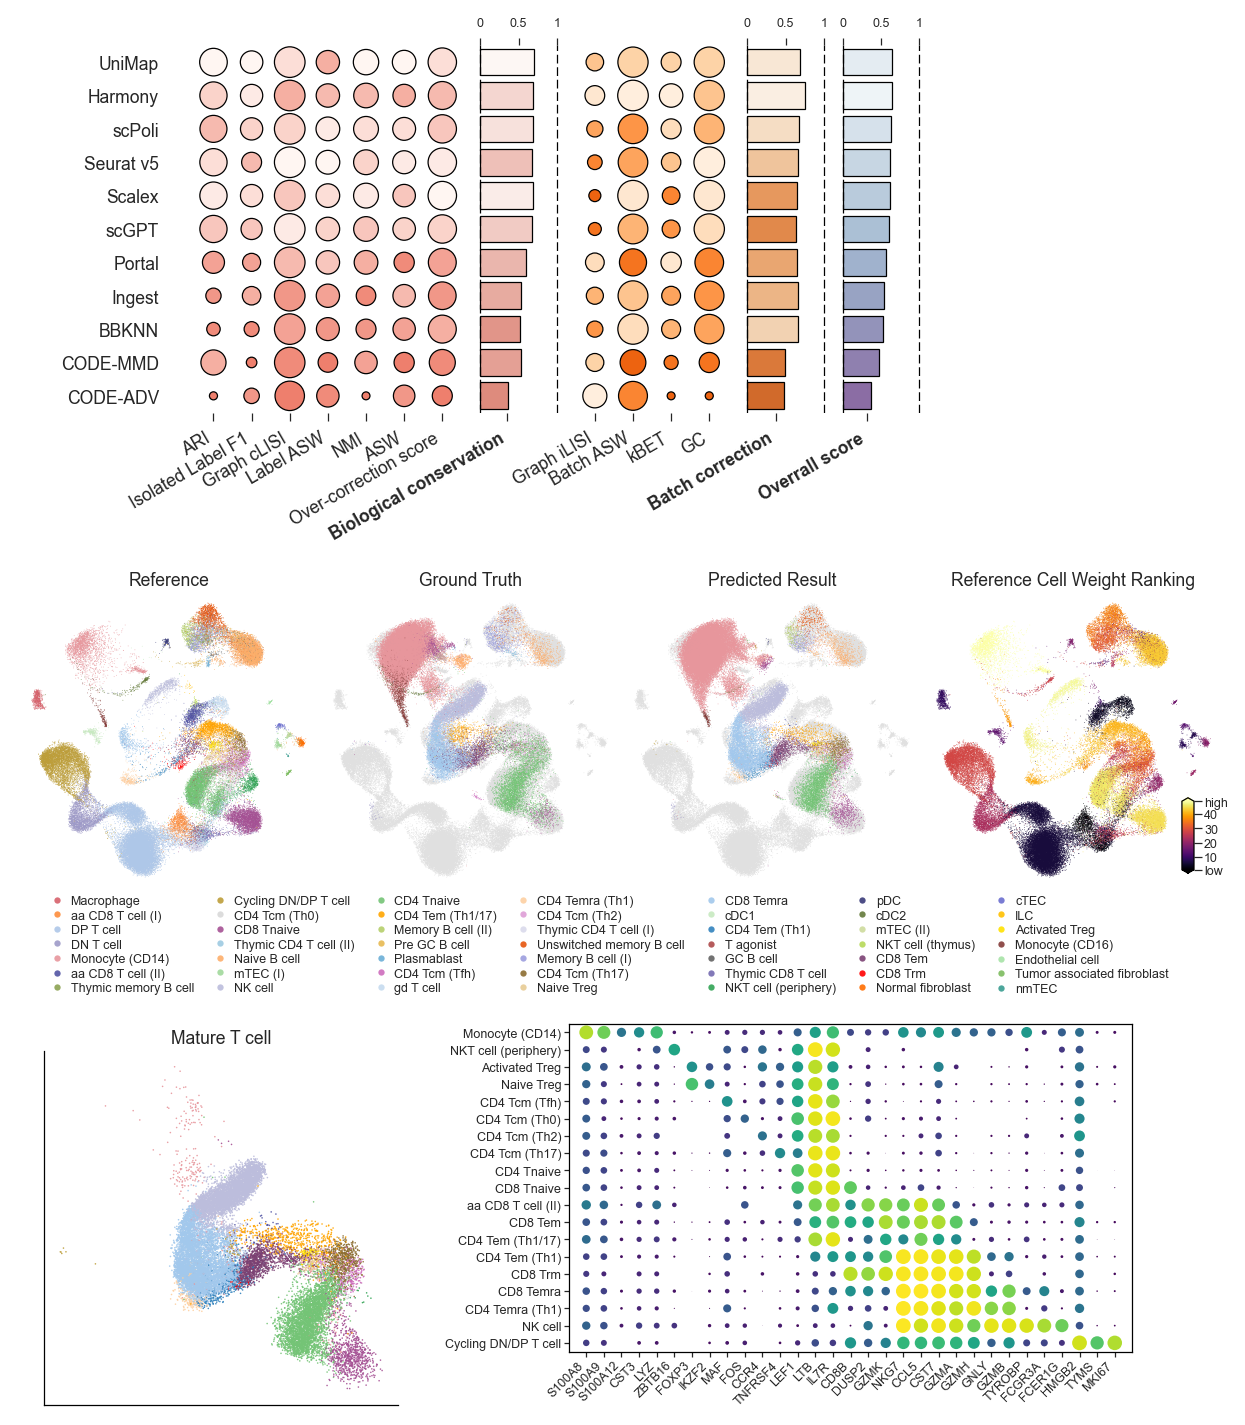

In [15]:
fig

In [16]:
fig.savefig('../figs/fig4.pdf', dpi=720)